# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converting a categorical variable into separate binary variables |
| **Feature selection*** | Automatic selection of the most important predictor variables for our regression |
| **Classifier** | Model that assigns categorical outputs rather than performing numeric predictions |
| **Precision** | True positives / (True positives + False positives)  |
| **Recall** | True positives / (True positives + False negatives)  |
| **F1 Score** | 2 ((precision * recall)/(precision + recall)) |
| **Parsimonious model** | The simplest model (fewest parameters) that explains our data well |
| **Ridge regression** | $$ \min_{\beta} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \alpha \sum_{j=1}^{p} \beta_j^2 $$ |
| **LASSO regression** | $$ \min_{\beta} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \alpha \sum_{j=1}^{p} |\beta_j| $$ |
| **Cross validation** | A method to perform train/test splits multiple times to assess the model performance fairly |
| **Tree based methods** | Methods that recursively partitions features into interpretable regions. |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier looks like a rectangle and a bad classifier looks like the y=x line.
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
F1 close to 1 means that the model's accuracy and recall is close to perfect, and the model is a really good classifier. F1 close to 0 means the model is a very poor classifier.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Straight line | S-shaped |
| **Dependent Variable Type** | Continuous | Categorical |
| **Purpose** (regression or classification) | Regression | Classification |
| **Range of output variable** ($y_i$ or $p_i$) | All real numbers | 0 to 1 |
| **Method*** | Ordinary Least Squares | Maximum Likelihood Estimation |
| **Example of use** | Predicting the price of an item | Classifying whether an individual is high-risk or low-risk for a disease |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to do this to avoid overfitting, and we can either do it through test/train single split or cross-validation.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?
Linear regression is appropriate because our outcome, median house value, is continuous.

In [1]:
library(tidyverse)
df_housing <- read_csv("housing.csv")
head(df_housing)
summary(df_housing)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [2]:

# Scale data.
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

d_num <- df_housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Split data - 75% training and 25% testing.
train <- runif(nrow(d_num)) < 0.75
test <- !train
set.seed(123)

#### c) Fit the model.

In [3]:
# 5. Fit model on the training data only.
f = median_house_value ~  latitude + longitude + total_rooms + population + households + median_income + housing_median_age

m <- lm(f, data=d_num %>% filter(train))
summary(m)

# 6. Prediction on test data.
dx <- d_num %>% filter(test)

dx <- dx %>%
  mutate(median_house_value_pred = predict(m, dx %>% as.data.frame()))


Call:
lm(formula = f, data = d_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10871 -0.09233 -0.02447  0.06460  1.75374 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.733782   0.015570   47.13   <2e-16 ***
latitude           -0.817238   0.015179  -53.84   <2e-16 ***
longitude          -0.868668   0.017175  -50.58   <2e-16 ***
total_rooms        -0.105562   0.064379   -1.64    0.101    
population         -3.105534   0.089098  -34.85   <2e-16 ***
households          1.797166   0.062529   28.74   <2e-16 ***
median_income       1.138462   0.010927  104.19   <2e-16 ***
housing_median_age  0.116626   0.005304   21.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1453 on 15431 degrees of freedom
Multiple R-squared:  0.6271,	Adjusted R-squared:  0.6269 
F-statistic:  3707 on 7 and 15431 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5201 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


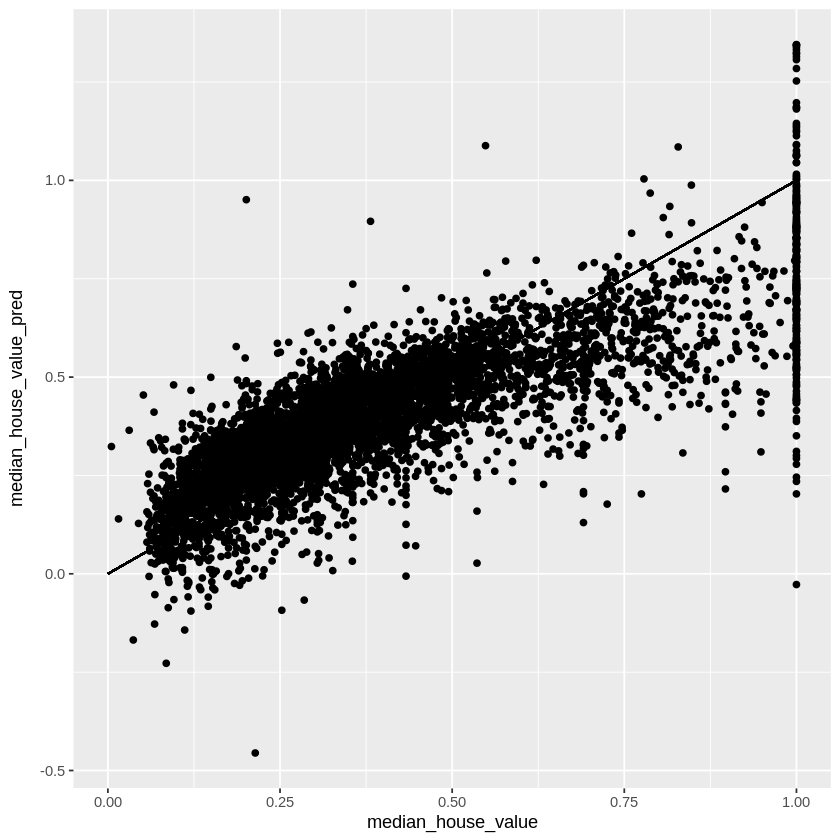

In [4]:
ggplot(dx, aes(median_house_value, median_house_value_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))


#### e) Make a residuals plot.

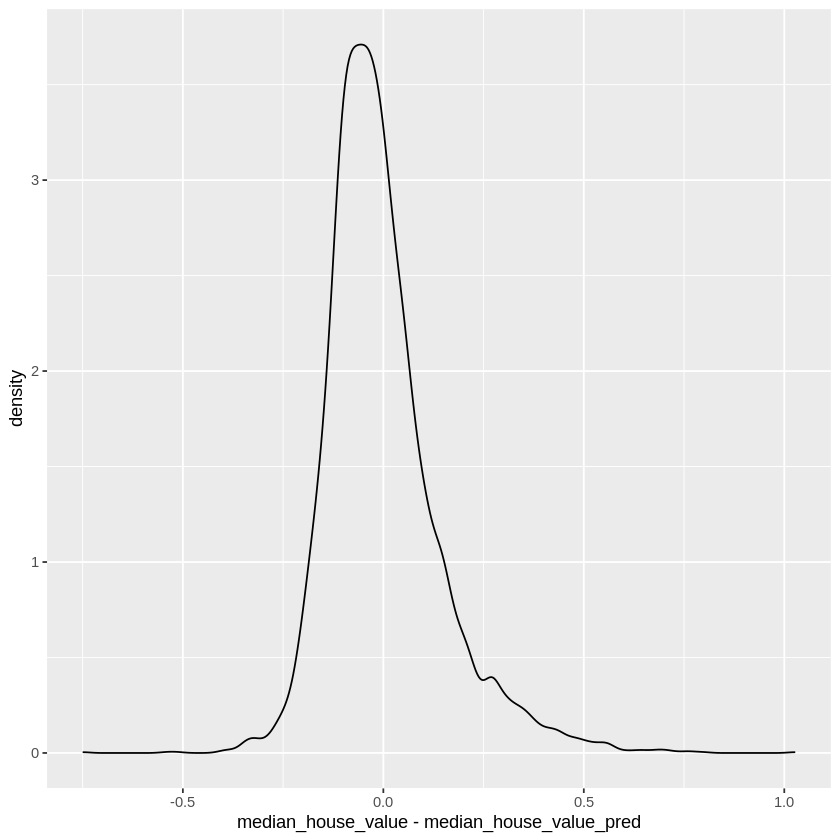

In [5]:
ggplot(dx, aes(median_house_value-median_house_value_pred)) + geom_density()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

Logistic regression is appropriate here because diabetes diagnosis is categorical.

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


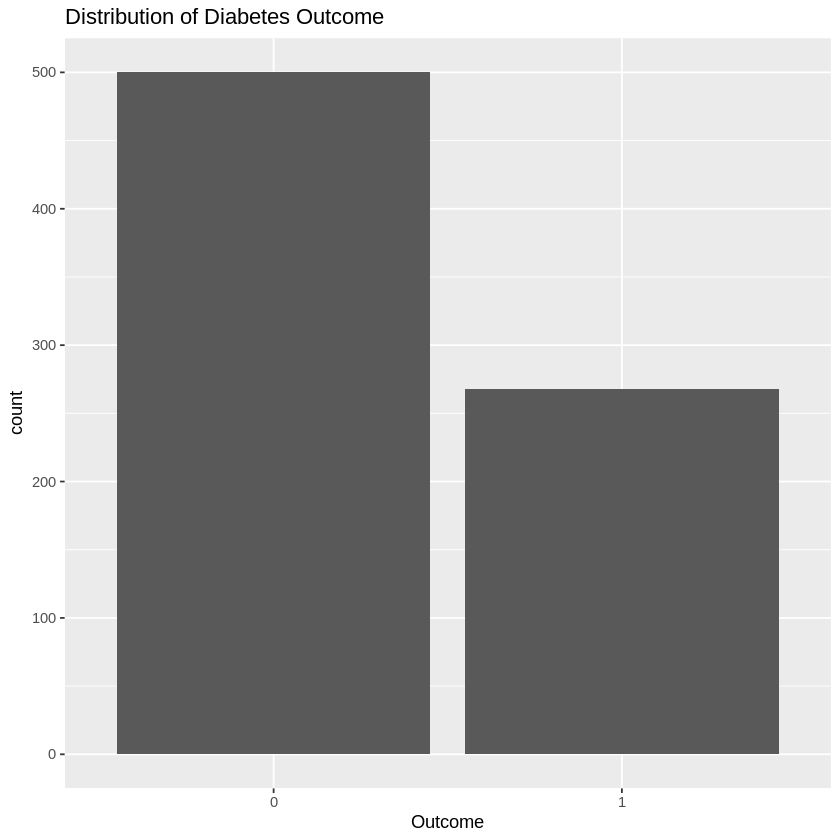

In [6]:
library(tidyverse)
library(ggplot2)
d <- read_csv("diabetes.csv")
head(d)
d$Outcome <- as.factor(d$Outcome)
ggplot(d, aes(x = Outcome)) +
  geom_bar() +
  labs(title = "Distribution of Diabetes Outcome")

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [7]:
scale <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

d <- read_csv("diabetes.csv") %>% as_tibble() %>% filter(complete.cases(.)) %>%
  transmute(
    Pregnancies = Pregnancies %>% scale(),
    Glucose = Glucose %>% scale(),
    BloodPressure = BloodPressure %>% scale(),
    SkinThickness = SkinThickness %>% scale(),
    Insulin = Insulin %>% scale(),
    BMI = BMI %>% scale(),
    DiabetesPedigreeFunction = DiabetesPedigreeFunction %>% scale(),
    Age = Age %>% scale(),
    Outcome = Outcome
  )

set.seed(123)
n <- nrow(d)
train_idx <- sample.int(n, size = floor(0.75 * n))
d_train <- d %>% slice(train_idx)
d_test  <- d %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### c) Fit the model.

In [8]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)

saveRDS(m, "diabetes_logres.rds")


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
Pregnancies                1.9808     0.6376   3.107  0.00189 ** 
Glucose                    7.3239     0.8832   8.293  < 2e-16 ***
BloodPressure             -1.6659     0.7236  -2.302  0.02131 *  
SkinThickness              0.4781     0.7778   0.615  0.53875    
Insulin                   -1.1441     0.8556  -1.337  0.18117    
BMI                        5.7136     1.1584   4.932 8.12e-07 ***
DiabetesPedigreeFunction   1.6852     0.7724   2.182  0.02912 *  
Age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of Fisher 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [9]:
d_test <- read_csv("diabetes_test.csv", show_col_types = FALSE)
m <- readRDS("diabetes_logres.rds")

p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

The important variables are pregnancies, glucose, blood pressure, insulin, BMI, diabetes pedigree function, and age; LASSO model increased the accuracy of the model.

In [11]:
install.packages(c("glmnet","broom","gridExtra","readr","dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [12]:
suppressPackageStartupMessages(library(glmnet))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(dplyr))

set.seed(123)

d <- read_csv("diabetes.csv", show_col_types = FALSE)

y <- d$Outcome

X <- model.matrix(Outcome ~ ., d)[, -1]

cvfit <- cv.glmnet(X, y, alpha = 1, family = "binomial")

fit <- cvfit$glmnet.fit

best_fit <- glmnet(X, y,
                   lambda = cvfit$lambda.min,
                   family = "binomial")

print(best_fit$beta)

8 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
Pregnancies               0.1149273254
Glucose                   0.0334155226
BloodPressure            -0.0106844974
SkinThickness             .           
Insulin                  -0.0008078166
BMI                       0.0826759336
DiabetesPedigreeFunction  0.8382145491
Age                       0.0133817600


In [13]:
lasso_probs <- predict(best_fit, newx = X, type = "response")

lasso_preds <- ifelse(lasso_probs > 0.5, 1, 0)

accuracy <- mean(lasso_preds == y)

print(accuracy)

[1] 0.7786458


#### f) Make a plot of actual vs. predicted values for the LASSO model.

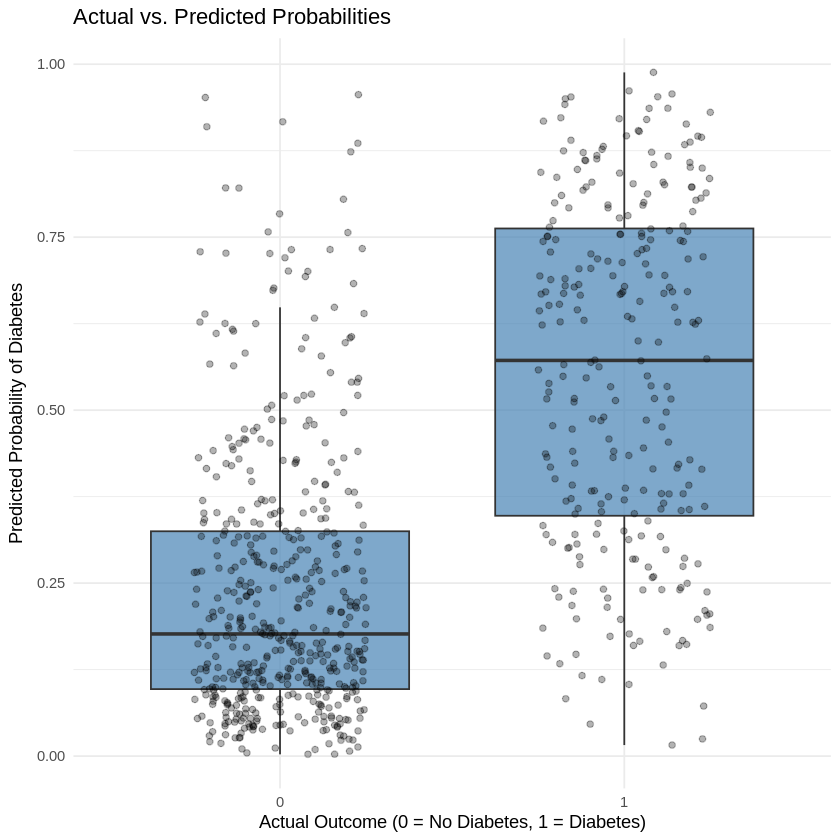

In [15]:
library(ggplot2)
library(dplyr)

plot_prob <- data.frame(
  Actual_Outcome = as.factor(y),
  Predicted_Probability = as.vector(lasso_probs)
)

ggplot(plot_prob, aes(x = Actual_Outcome, y = Predicted_Probability)) +
  geom_boxplot(fill = "steelblue", alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.25, alpha = 0.3, color = "black") +
  labs(
    title = "Actual vs. Predicted Probabilities",
    x = "Actual Outcome (0 = No Diabetes, 1 = Diabetes)",
    y = "Predicted Probability of Diabetes"
  ) +
  theme_minimal()